# Numpy Essentials
and a refresher of maths..


## Dot Product

Matrix multiplication is the dot product of those 2 matrices


In [1]:
import numpy as np

M1 = np.array([[1, 2], [3, 4]])
M2 = np.array([[5, 6], [7, 8]])

M1

array([[1, 2],
       [3, 4]])

In [2]:
M2

array([[5, 6],
       [7, 8]])

If we were to compute this by hand, then we would do the following:

$$
\begin{bmatrix}
    a  &  b      \\
    c  &  d      
\end{bmatrix}
x 
\begin{bmatrix}
    e  &  f      \\
    g  &  h      
\end{bmatrix} 
=
\begin{bmatrix}
    a*e+b*g  &  a*f+b*h      \\
    c*e+d*g  &  c*f+d*h      
\end{bmatrix} 
$$

Therefore, computing the above would yield:

$$
\begin{bmatrix}
    1  &  2      \\
    3  &  4      
\end{bmatrix}
x 
\begin{bmatrix}
    5  &  6      \\
    7  &  8      
\end{bmatrix} 
=
\begin{bmatrix}
    19  &  22      \\
    43  &  50      
\end{bmatrix} 
$$

and we confirm by running the code:

In [3]:
mdot = np.dot(M1,M2)
mdot

array([[19, 22],
       [43, 50]])

## Line Chart

Lets generate some random data by creating a one-dimensional array with 1000 evenly spaced points between 0 and 20

In [4]:
import matplotlib.pyplot as plt
x = np.linspace(1, 20, 1000)

The above will represent data for the x-axis. Now lets create some random data for the y-axis

In [5]:
y = np.sin(x) + 0.2 * x

Now lets plot it

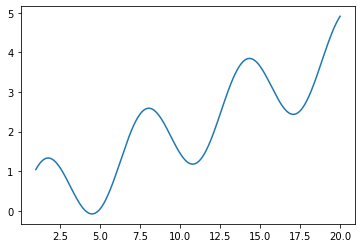

In [6]:
plt.plot(x, y)
plt.show()

Now, lets label the axis

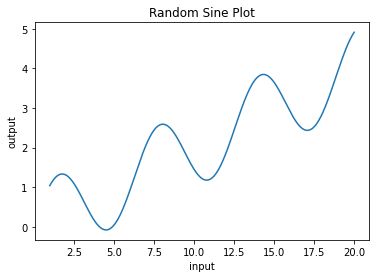

In [7]:
plt.plot(x, y)
plt.xlabel('input')
plt.ylabel('output')
plt.title('Random Sine Plot'); # the ';' suppresses the output of the title function

## Scatterplot

Lets create some random data from the standard normal shaped 100 observatrions and 2 dimensions

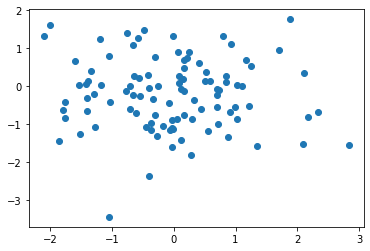

In [8]:
x = np.random.randn(100, 2)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In ML, we are often interested in classification or clustering where we want to draw scatteplots of data points with colors signifying different classes.

Lets create some random data again:

In [9]:
x = np.random.randn(200, 2)

Lets use half of this data to be centered at some different location

In [10]:
x[:50] += 3
y = np.zeros(200) # array of zeros of size 200

Lets set the first half of these labels to 1. This is so that all points centered at (3,3) have label 1 and all other points will have label zero

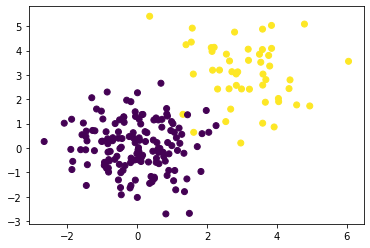

In [11]:
y[:50] = 1
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

The above data is random, so this plot doesnt really represent something meaningful

## Histogram

Histograms are used to plot the distribution of data. Lets create some random numbers:

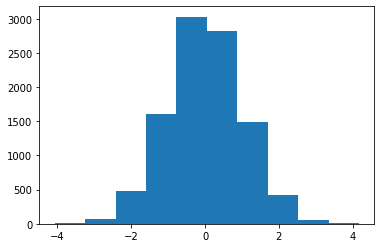

In [12]:
x = np.random.randn(10000)
plt.hist(x)
plt.show()

When we have this many data points its possible to get a better plot by having more bars. Lets use the bins argument:

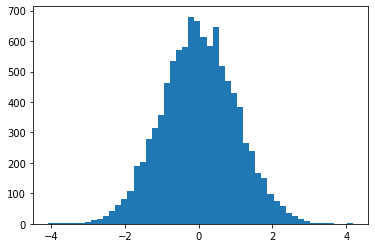

In [13]:
plt.hist(x, bins=50)
plt.show()

This data plot makes sense, since the random numbers we get from random.randn comes from a normal distribution (Bell curve).

Lets use now only the random.random samples from the uniform distribution just to confirm

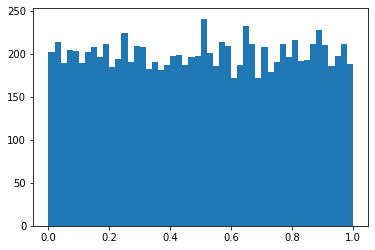

In [14]:
x = np.random.random(10000)
plt.hist(x, bins=50)
plt.show()

Hence we can confirm that the random function samples from the 0-1 distribution

## Plotting Images

Some ML data sets of images are stored in different formats than jpeg (for example). Lets first download an image:

In [15]:
!curl -O https://universityofreston.com/wp-content/uploads/2020/09/CX2-1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  118k  100  118k    0     0   127k      0 --:--:-- --:--:-- --:--:--  128k


Lets now load that image

In [16]:
from PIL import Image
im = Image.open('CX2-1.jpg')

In [17]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

By the above output, we can confirm that the image was downloaded and that the type of the image is JPG. Lets convert that into a numpy array

In [18]:
arr = np.array(im)

The reason this works it because an image is essentially an array of numbers. An image has two dimensions (height and width) and for each location of height and width it has a color value. Lets confirm it by printing the array

In [19]:
arr

array([[[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]],

       [[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]],

       [[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]],

       ...,

       [[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]],

       [[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]],

       [[41, 59, 73],
        [ 1, 19, 33],
        [16, 34, 48],
        ...,
        [16, 34, 48],
        [16, 34, 48],
        [16, 34, 48]]], dtype=uint8)

By the output above, the type of the array is an 8-bit integer array - which means that the values of each number within the array will be from 0 to 255 (2 to the power of 8)

In [20]:
arr.shape

(785, 1200, 3)

Interesantly, its shape is a 3 dimensional array. The first two values are the height and width, respectively, of the image. The third dimension of size 3 represents the 3 color values (red, green blue).

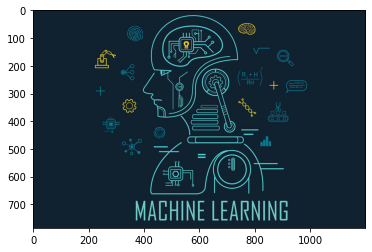

In [21]:
plt.imshow(arr)
plt.show()

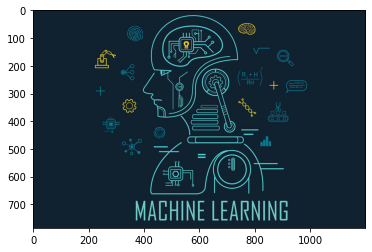

In [22]:
plt.imshow(im) # just to represent that it also works with the actual image as well
plt.show()

Usually in Computer Vision, the used images are grayscaled (black and white images). Taking a color image to a B&W image is to take the mean across the color channels

In [23]:
gray = arr.mean(axis=2)
gray.shape

(785, 1200)

The above output means that we have collapsed the color dimension

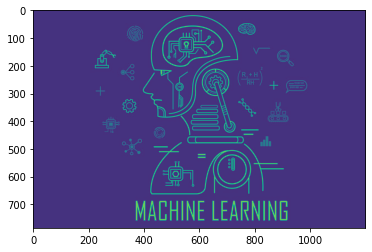

In [24]:
plt.imshow(gray)
plt.show()

Hmm, we were expecting a black and white image right? This specific output is showing us the heatmap of the image. We just forgot to pass in the c argument.

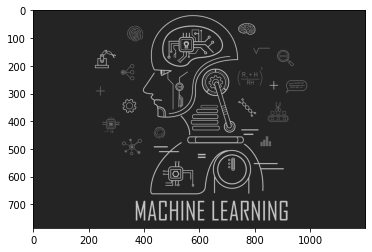

In [25]:
plt.imshow(gray, cmap='gray')
plt.show()

## Pandas

Loading in data. Very useful for reading tabular data.

In [26]:
import pandas as pd

In [28]:
!curl -O https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61896  100 61896    0     0   341k      0 --:--:-- --:--:-- --:--:--  355k


In [29]:
df = pd.read_csv('sbux.csv')

We can check the type of object `df` is by doing

In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
!head sbux.csv

date,open,high,low,close,volume,Name
2013-02-08,27.92,28.325,27.92,28.185,7146296,SBUX
2013-02-11,28.26,28.26,27.93,28.07,5457354,SBUX
2013-02-12,28.0,28.275,27.975,28.13,8665592,SBUX
2013-02-13,28.23,28.23,27.75,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
2013-02-15,27.805,27.85,27.085,27.17,18195730,SBUX
2013-02-19,27.18,27.305,27.01,27.225,11760912,SBUX
2013-02-20,27.3,27.42,26.59,26.655,12472506,SBUX
2013-02-21,26.535,26.82,26.26,26.675,13896450,SBUX


In [32]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


Comparing both the command `head` and using pandas `head()` method, we can see that the latter method prints a nicely formatted table. Using different arguments we can get more info:


In [33]:
df.head(10) # shows us the first 10 rows, instead of the first 5

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
5,2013-02-15,27.805,27.850,27.085,27.170,18195730,SBUX
6,2013-02-19,27.180,27.305,27.010,27.225,11760912,SBUX
7,2013-02-20,27.300,27.420,26.590,26.655,12472506,SBUX
8,2013-02-21,26.535,26.820,26.260,26.675,13896450,SBUX
9,2013-02-22,26.850,27.105,26.640,27.085,11487316,SBUX


In [35]:
df.tail() # shows the end of the data

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [40]:
df.info() # kind of index, num of cols, data type of cols, and how much memory it takes up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


Selecting rows and columns

In [41]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

Now that we know the columns it contains, we can access them by

In [42]:
df['open']

0       27.920
1       28.260
2       28.000
3       28.230
4       27.765
         ...  
1254    56.280
1255    55.900
1256    55.530
1257    53.685
1258    55.080
Name: open, Length: 1259, dtype: float64

In [43]:
df[['open', 'close']]

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775
...,...,...
1254,56.280,56.000
1255,55.900,55.770
1256,55.530,54.690
1257,53.685,55.610


In [44]:
type(df['open'])

pandas.core.series.Series

In [45]:
type(df[['open', 'close']])

pandas.core.frame.DataFrame

When we are working with one dimension of pandas its typically stored as a `series` and if two dimensional then its a `data frame`

In [46]:
df.iloc[0]

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
Name            SBUX
Name: 0, dtype: object

In [47]:
df.loc[0]

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
Name            SBUX
Name: 0, dtype: object

Suppose we want all the rows where the `open` columns contains numbers greater than 64

In [48]:
df[df['open'] > 64]

,date,open,high,low,close,volume,Name
1087,2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
1088,2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
1089,2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


Usually ML deals with array of numbers. We do so by converting the data

In [49]:
df.values

array([['2013-02-08', 27.92, 28.325, ..., 28.185, 7146296, 'SBUX'],
       ['2013-02-11', 28.26, 28.26, ..., 28.07, 5457354, 'SBUX'],
       ['2013-02-12', 28.0, 28.275, ..., 28.13, 8665592, 'SBUX'],
       ...,
       ['2018-02-05', 55.53, 56.26, ..., 54.69, 16059955, 'SBUX'],
       ['2018-02-06', 53.685, 56.06, ..., 55.61, 17415065, 'SBUX'],
       ['2018-02-07', 55.08, 55.43, ..., 54.46, 13927022, 'SBUX']],
      dtype=object)

but, tends to avoid using the dtype `object` because there are strings inside the array. Hence:

In [52]:
A = df[['open', 'close']].values
A

array([[27.92 , 28.185],
       [28.26 , 28.07 ],
       [28.   , 28.13 ],
       ...,
       [55.53 , 54.69 ],
       [53.685, 55.61 ],
       [55.08 , 54.46 ]])

In [53]:
type(A)

numpy.ndarray

To save the data:

In [54]:
smalldf = df[['open', 'close']]
smalldf.to_csv('output.csv', index=False)

In [55]:
!head output.csv

open,close
27.92,28.185
28.26,28.07
28.0,28.13
28.23,27.915
27.765,27.775
27.805,27.17
27.18,27.225
27.3,26.655
26.535,26.675


When we want to do some operations, the `apply` functions is ideal when we want to manupulate data from a row or column. It does what you want from a for-loop.

In [56]:
def date_to_year(row):
    return (int(row['date'].split('-')[0])) # YYYY-MM-DD

df.apply(date_to_year, axis=1) # axis is needed to operate row-wise, instead of column-wise

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1254    2018
1255    2018
1256    2018
1257    2018
1258    2018
Length: 1259, dtype: int64

And if we wanted to append this data to the csv:

In [57]:
df['year'] = df.apply(date_to_year, axis=1)
df.head() # there will be a new column named year

,date,open,high,low,close,volume,Name,year
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,2013
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,2013
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,2013


Plotting data:

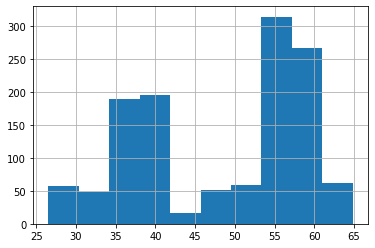

In [62]:
df['open'].hist();

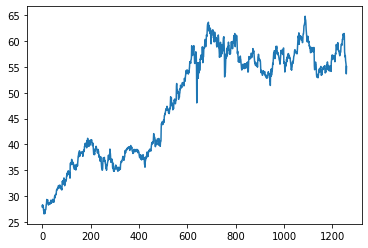

In [63]:
df['open'].plot();

Their plotting naming correspond to the `matplotlib` version

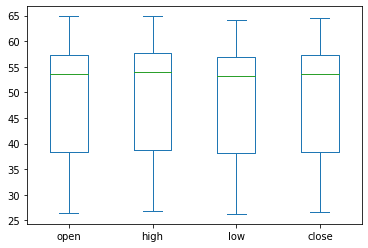

In [65]:
df[['open', 'high', 'low', 'close']].plot.box();

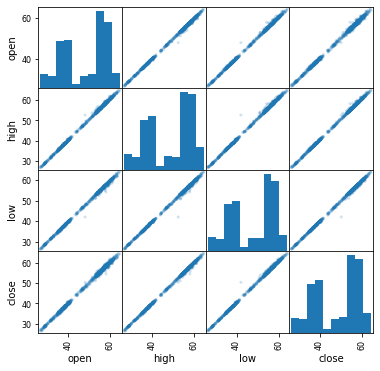

In [67]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['open', 'high', 'low', 'close']], alpha=0.2, figsize=(6, 6));

The `alpha` makes the dot have transparency and `figsize` make the plot a little bigger.